# IBM Stock Price

### Final Assignement

<br/> Benas Maruškevičius
<br/> email: benas.ma8730@go.kauko.lt

### Import libraries

We need 3 main libraries:

- [Numpy](http://www.numpy.org): it is the fundamental package for scientific computing with Python. It contains among other things a powerful N-dimensional array object that can be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined.
- [matplotlib](https://matplotlib.org):  it is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
- [pandas](https://pandas.pydata.org): is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [63]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import the dataset

Dataset description: the open high, low and close values of the Google Stock from 2012 to 2016. [Relevant code here](https://github.com/pdway53/Predict_Google_Stock_Price_RNN)

In [64]:
#importing the dataset
dataset_train = pd.read_csv('Training_Data.csv')

In [65]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-07-30,118.000000,119.370003,117.669998,117.860001,86.538223,6803100
1,2009-07-31,117.559998,118.989998,117.559998,117.930000,86.589630,5329600
2,2009-08-03,118.879997,119.959999,118.690002,119.919998,88.050774,6108200
3,2009-08-04,119.169998,119.800003,119.019997,119.599998,87.815811,4993500
4,2009-08-05,118.519997,119.000000,117.860001,118.470001,86.986099,5025800


In [66]:
# Create a subtable of relevant entries (open values)
training_set = dataset_train.iloc[:, 1:2].values 

In [67]:
training_set

array([[118.      ],
       [117.559998],
       [118.879997],
       ...,
       [151.      ],
       [151.110001],
       [150.      ]])

### Feature Scaling

In [68]:
# Feature Scaling

# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [69]:
# create a scaler instance to rescale all data to the range of 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))

In [70]:
# create the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [71]:
training_set_scaled

array([[0.09312721],
       [0.08902959],
       [0.10132237],
       ...,
       [0.40044699],
       [0.4014714 ],
       [0.39113427]])

### Splitting the training set to dependent and independent variables

In [72]:
# Creating a data structure with 90 timesteps and 1 output

# the 90 stock prices
X_train = [] 

In [73]:
training_set_scaled.shape

(2517, 1)

In [74]:
# the stock price today
y_train = [] 

In [75]:
# we start from day 90 because that is the first instance allowing us to 
# go back 90 days
for i in range(90, 2517): 
    # 0 is the column ID, the only column in this case.    
    # put the last 90 days values in one row of X_train
    X_train.append(training_set_scaled[i-90:i, 0]) 
    y_train.append(training_set_scaled[i, 0])

In [76]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [77]:
X_train

array([[0.09312721, 0.08902959, 0.10132237, ..., 0.17992176, 0.18252931,
        0.18997945],
       [0.08902959, 0.10132237, 0.10402307, ..., 0.18252931, 0.18997945,
        0.17582414],
       [0.10132237, 0.10402307, 0.09796979, ..., 0.18997945, 0.17582414,
        0.17666232],
       ...,
       [0.30694734, 0.3029428 , 0.28962567, ..., 0.39644259, 0.39225175,
        0.38945805],
       [0.3029428 , 0.28962567, 0.30704041, ..., 0.39225175, 0.38945805,
        0.40044699],
       [0.28962567, 0.30704041, 0.28925309, ..., 0.38945805, 0.40044699,
        0.4014714 ]])

### Reshaping the Matrix

We need to add a new matrix dimension to accommodate the indicator (predictor). 

In [78]:
# Reshaping the data matrix, we retain the 2 original dimensions and add a third of depth=1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

In [79]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [80]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

### Add First Layer

In [81]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

In [82]:
# the argument is the dropout rate to ignore in the layers (20%)
regressor.add(Dropout(0.2))


### Add More Layers

In [83]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [84]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [85]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Add Output Layer & Compile

In [86]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [87]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Train and deploy the RNN

### Fit the RNN to the Training set

In [88]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2427/2427 [==============================] - 19s 8ms/step - loss: 0.0328
Epoch 2/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0064
Epoch 3/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0056
Epoch 4/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0048
Epoch 5/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0050
Epoch 6/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0042
Epoch 7/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0041
Epoch 8/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0042
Epoch 9/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0043
Epoch 10/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0036
Epoch 11/100
2427/2427 [==============================] - 17s 7ms/step - loss: 0.0040
Epoch 12/100
2427/2427 [==============================] - 17s 7

2427/2427 [==============================] - 17s 7ms/step - loss: 8.6506e-04
Epoch 96/100
2427/2427 [==============================] - 17s 7ms/step - loss: 9.0367e-04
Epoch 97/100
2427/2427 [==============================] - 17s 7ms/step - loss: 8.5505e-04
Epoch 98/100
2427/2427 [==============================] - 17s 7ms/step - loss: 9.1196e-04
Epoch 99/100
2427/2427 [==============================] - 17s 7ms/step - loss: 9.2759e-04
Epoch 100/100
2427/2427 [==============================] - 17s 7ms/step - loss: 8.9241e-04


### Computing Predictions

In [89]:
# Getting the real stock price

dataset_test = pd.read_csv('Test_Data.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-31,149.699997,150.179993,146.389999,148.240005,146.513687,3722900
1,2019-08-01,148.899994,152.820007,148.500000,150.320007,148.569458,6344000
2,2019-08-02,149.029999,152.949997,145.589996,147.250000,145.535202,8101700
3,2019-08-05,144.979996,145.100006,139.149994,140.759995,139.120789,7114900
4,2019-08-06,142.029999,142.470001,139.309998,140.729996,139.091141,5070700
5,2019-08-07,138.740005,139.580002,136.410004,139.110001,137.490005,5931900
6,2019-08-08,138.449997,140.419998,137.759995,140.100006,140.100006,5261100
7,2019-08-09,139.270004,139.309998,135.350006,136.130005,136.130005,5244600
8,2019-08-12,135.660004,135.869995,133.179993,134.119995,134.119995,3895600
9,2019-08-13,133.800003,136.570007,132.809998,135.789993,135.789993,4522100


In [90]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

23

In [91]:
real_stock_price

array([[149.699997],
       [148.899994],
       [149.029999],
       [144.979996],
       [142.029999],
       [138.740005],
       [138.449997],
       [139.270004],
       [135.660004],
       [133.800003],
       [133.910004],
       [131.220001],
       [133.039993],
       [134.880005],
       [135.240005],
       [134.960007],
       [134.690002],
       [133.630005],
       [131.050003],
       [131.199997],
       [130.440002],
       [134.179993],
       [135.580002]])

In [92]:
# Getting the predicted stock price of 2019 August

# axis = 0 means concatenate the lines (i.e. vertical axis)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [93]:
dataset_total.size

2540

In [94]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values

In [95]:
inputs.size

113

In [96]:
# we did not use iloc from panda so lets reshape the numpy array for 
# compatibility: i.e. all the values from input lines to be stacked in one 
# column. The -1 means that the numpy has no knowledge of how the 
# values were stored in lines. The 1 means we want to them in one 
# column.

inputs = inputs.reshape(-1,1) 

# apply the feature scaler
inputs = sc.transform(inputs)

In [97]:
# Getting the predicted stock price of 2019 August
X_test = []

In [98]:
# the first 90 from inputs are from training set; start 
# from 90 and get the extra 20, i.e. up to 110
for i in range(90, 111): 
    X_test.append(inputs[i-90:i, 0])

In [99]:
X_test = np.array(X_test) # not 3D structure yet

In [100]:
# create a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [101]:
predicted_stock_price = regressor.predict(X_test)

In [102]:
# need to inverse the scaling to get meaningful predicted stock price # outputs
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

21

### Result Visualization

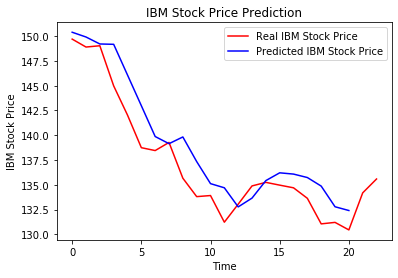

In [103]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted IBM Stock Price')

plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()

plt.show()